In [1]:
import cv2
import numpy as np
from edge import sobel_edge
import tools
import matplotlib.cm as cm   
import math
from copy import deepcopy

In [2]:
img = cv2.imread('img/building.png', cv2.IMREAD_COLOR)
img = cv2.imread('gros_test.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# img = cv2.imread('img/building.png', cv2.IMREAD_GRAYSCALE)
# img = cv2.imread('gros_test.png', cv2.IMREAD_GRAYSCALE)
#gray = cv2.imread('img/building.png', cv2.IMREAD_GRAYSCALE)
# gray = deepcopy(img)

# low pass filter
#ka7 = np.ones((5, 5), dtype=float) / 80
#img_lp = cv2.filter2D(gray, -1, ka7, borderType=cv2.BORDER_CONSTANT)
img_lp = gray

In [3]:
edges_sobel = cv2.Canny(img_lp, 50, 200, None, 3)#sobel_edge(img_lp, threshold=15)

In [4]:
lines = cv2.HoughLinesP(edges_sobel, 1, np.pi/180, threshold=50, minLineLength=30, maxLineGap=10)

img_proba = deepcopy(img)

for line in lines:
    x1, y1, x2, y2 = line[0]
    print((x1, y1))
    print((x2, y2))
    cv2.line(img_proba, (x1, y1), (x2, y2), (255, 0, 0), 1)  


(39, 47)
(330, 47)
(37, 52)
(332, 52)


In [5]:
"""
https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html
"""

lines = cv2.HoughLines(edges_sobel, 1, np.pi/180, 100, None, 0, 0)

img_hough = cv2.imread('gros_test.png')
print(cv2.imread('gros_test.png', cv2.IMREAD_GRAYSCALE).shape)
print(cv2.imread('gros_test.png').shape)

for line in lines[0:1000]:
    for rho, theta in line:
        print(rho)
        print(theta)
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        print(x0)
        print(y0)
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)) , int(y0 - 1000*(a)))
        print(pt1)
        print(pt2)
        cv2.line(img_hough, pt1, pt2, (255, 0, 0), 1)

(113, 408)
(113, 408, 3)
52.0
1.5707964
-2.2729922800968456e-06
51.99999999999995
(-1000, 51)
(999, 52)
47.0
1.5707964
-2.0544353300875335e-06
46.99999999999995
(-1000, 46)
(999, 47)


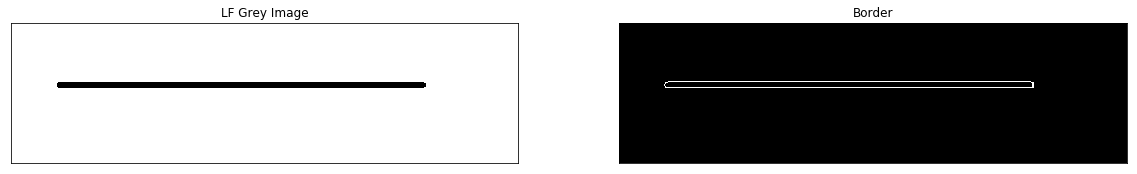

In [6]:
tools.multiPlot(1, 2, 
                (img_lp, edges_sobel),
                ('LF Grey Image', 'Border'),
                cmap_tuple=(cm.gray, cm.gray))

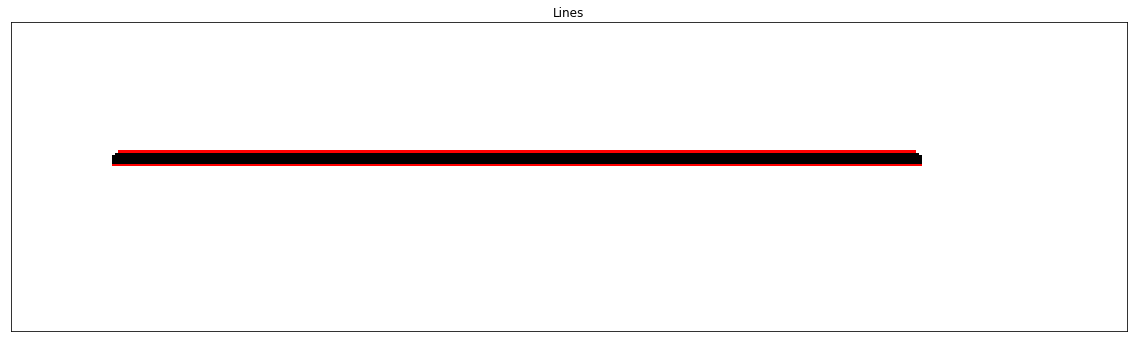

In [7]:
tools.multiPlot(1, 1, 
                (img_proba,),
                ('Lines',),
                cmap_tuple=(cm.gray,))

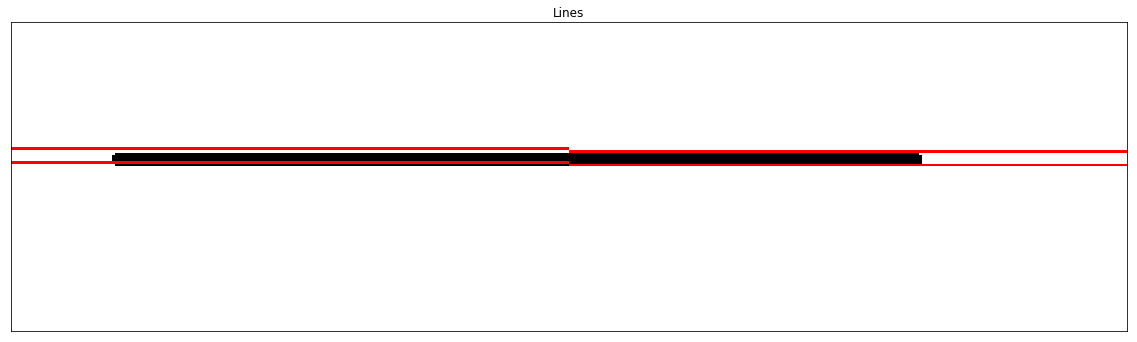

In [8]:
tools.multiPlot(1, 1, 
                (img_hough,),
                ('Lines',),
                cmap_tuple=(cm.gray,))

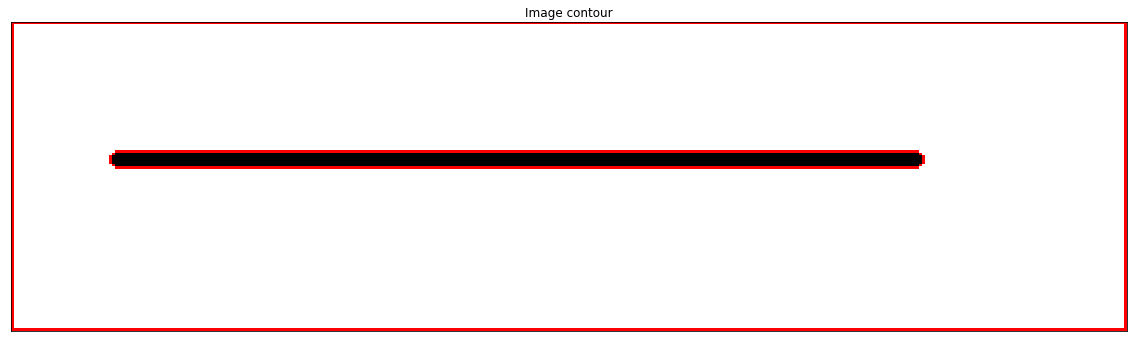

In [9]:
img_cont = deepcopy(img)
# ret, thresh = cv2.threshold(img_lp, 0, 255, 0)
# ret, thresh = cv2.threshold(edges_sobel, 0, 255, 0)
# thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 7, 20)
ret, thresh = cv2.threshold(gray, 240, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img_cont, contours, -1, (255, 0, 0), 1)
tools.multiPlot(1, 1, 
                (img_cont,),
                ('Image contour',),
                cmap_tuple=(cm.gray,))

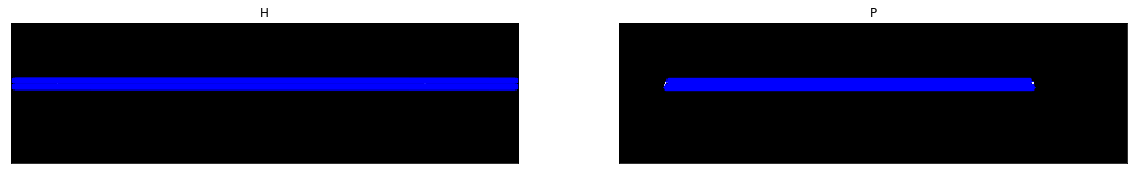

0

In [10]:
"""
@file hough_lines.py
@brief This program demonstrates line finding with the Hough transform
"""
import sys
import math
import cv2 as cv
import numpy as np


def main(argv):
    
    default_file = 'gros_test.png'
    filename = argv[0] if len(argv) > 0 else default_file

    # Loads an image
    src = cv.imread(cv.samples.findFile(filename), cv.IMREAD_GRAYSCALE)

    # Check if image is loaded fine
    if src is None:
        print ('Error opening image!')
        print ('Usage: hough_lines.py [image_name -- default ' + default_file + '] \n')
        return -1
    

    
    dst = cv.Canny(src, 50, 200, None, 3)
    

    # Copy edges to the images that will display the results in BGR
    cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
    cdstP = np.copy(cdst)

    lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
    
    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))

            cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)
    

    
    linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)
    
    if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)
    
    tools.multiPlot(1, 2, 
                    (cdst, cdstP),
                    ('H', 'P'),
                    cmap_tuple=(cm.gray, cm.gray))
    
    cv.waitKey()
    return 0
    

main([])
